<a href="https://colab.research.google.com/github/it-ces/PUBLIC-AI/blob/main/Probability/Simlab/Simulation_CI_Proportion(ai_page).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# We have a population where p is 0.37
P = 0.37
pop = np.random.choice([1,0], 653, p =[P, 1-P])
pd.DataFrame(pop).value_counts(normalize=True)

0    0.632466
1    0.367534
dtype: float64

In [ ]:
sample = [1,0,1,1,0,1]

In [ ]:
def ci(sample,z):
  n = len(sample)
  p_hat = sum(sample) / n
  se = np.sqrt(p_hat*(1-p_hat)/ n)
  lower_bound = p_hat - (z * se)
  upper_bound = p_hat + (z * se)
  return lower_bound, upper_bound

In [ ]:
trials = 2500
size , z = 57, 1.96
counter = 0
for _ in range(trials):
  sample = np.random.choice(pop, size, replace=False)
  interval = ci(sample, z)
  if P>= interval[0] and P<= interval[1]:
    counter+=1
print(counter/trials)

0.95


In [ ]:
sample =  np.random.choice(pop, size, replace=False)
print(sum(sample), size)
ci(sample, z)

22 57


(0.25958176960687573, 0.5123480549545277)

In [ ]:
### We could plot a histogram
games = 500
percentages = []
for _ in range(games):
  counter = 0
  for _ in range(trials):
    sample = np.random.choice(pop, size, replace=False)
    interval = ci(sample, z)
    if P>= interval[0] and P<= interval[1]:
      counter+=1
  percentages.append(counter/trials)

(array([  7.,   9.,  39.,  69., 107., 108.,  89.,  42.,  22.,   8.]),
 array([0.8948 , 0.89796, 0.90112, 0.90428, 0.90744, 0.9106 , 0.91376,
        0.91692, 0.92008, 0.92324, 0.9264 ]),
 <BarContainer object of 10 artists>)

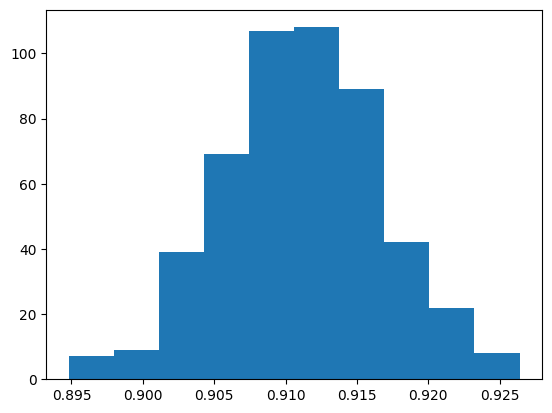

In [ ]:
plt.hist(percentages)

In [ ]:
# Excersice BINOMIAL EXACT CALCULATION